In [ ]:
# svm from convnet

In [1]:
# http://scikit-learn.org/stable/tutorial/machine_learning_map/
import os
import numpy as np

PATH_TO_DATA = "../architecture/feature-maps/"
# example
# DF_MAP = "example_dfmap"
# LABELS = "example_imgLabels"

# real
DF_MAP = "VGG16-dfmap"
DF_MAP_PCA = "VGG16-dfmap-PCA"
LABELS = "VGG16-imgLabels"

In [2]:
import pickle

features = pickle.load(open(os.path.join(PATH_TO_DATA,DF_MAP),'rb')) # first without PCA technique
labels = pickle.load(open(os.path.join(PATH_TO_DATA,LABELS),'rb'))

In [3]:
features_array = np.array(features)
labels_array = np.array(labels)

In [4]:
from sklearn.model_selection import train_test_split
# change test size, X train x test Y train y test check features_array has the correct dim otherwise .Transpose

# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = \
train_test_split(features_array, labels_array, test_size=0.2, random_state=42)

In [5]:
print("train")
print("x",type(x_train))
print("x",x_train.shape)
print()
print("y",type(y_train))
print("y",y_train.shape)
print()
print()
print("test")
print("x",type(x_test))
print("x",x_test.shape)
print()
print("y",type(y_test))
print("y",y_test.shape)

train
x <class 'numpy.ndarray'>
x (4000, 4096)

y <class 'numpy.ndarray'>
y (4000,)


test
x <class 'numpy.ndarray'>
x (1000, 4096)

y <class 'numpy.ndarray'>
y (1000,)


In [8]:
# svm classifier
from sklearn.svm import LinearSVC

# model definition
SVM = LinearSVC()

# model training
SVM.fit(x_train, y_train)

# model predict
y_pred = SVM.predict(x_test)

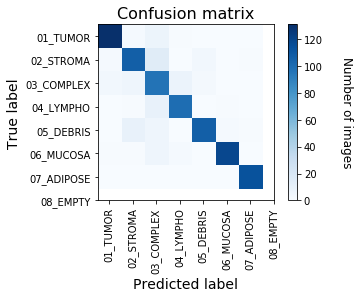

In [9]:
# Decision Tree without PCA - confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

def SVM_NO_PCA_CM(y_true,y_pred):
    
    # confusion matrix
    CM = confusion_matrix(y_true,y_pred)
    
    # image's categories
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    
    # color pallete
    plt.imshow(CM[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.title("Confusion matrix", fontsize=16)
    
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    
    plt.tight_layout()
    
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

SVM_NO_PCA_CM(y_test,y_pred)

In [10]:
# metrics
from sklearn.metrics import accuracy_score

print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy: 90.5%


In [ ]:
# svm + pca

In [11]:
# open the files
import pickle

features = pickle.load(open(os.path.join(PATH_TO_DATA,DF_MAP_PCA),'rb')) # first without PCA technique
labels = pickle.load(open(os.path.join(PATH_TO_DATA,LABELS),'rb'))

In [12]:
features_array = np.array(features)
labels_array = np.array(labels)

In [13]:
from sklearn.model_selection import train_test_split
# change test size, X train x test Y train y test check features_array has the correct dim otherwise .Transpose

# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = \
train_test_split(features_array, labels_array, test_size=0.2, random_state=42)


In [14]:
print("train")
print("x",type(x_train))
print("x",x_train.shape)
print()
print("y",type(y_train))
print("y",y_train.shape)
print()
print()
print("test")
print("x",type(x_test))
print("x",x_test.shape)
print()
print("y",type(y_test))
print("y",y_test.shape)

train
x <class 'numpy.ndarray'>
x (4000, 800)

y <class 'numpy.ndarray'>
y (4000,)


test
x <class 'numpy.ndarray'>
x (1000, 800)

y <class 'numpy.ndarray'>
y (1000,)


In [15]:
# svm classifier
from sklearn.svm import LinearSVC

# model definition
SVM_PCA = LinearSVC()

# model training
SVM_PCA.fit(x_train, y_train)

# model predict
y_pred = SVM_PCA.predict(x_test)

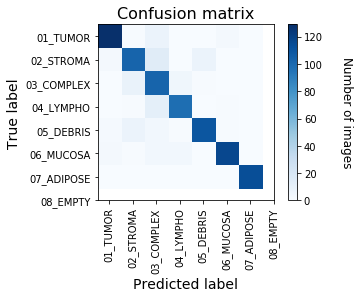

In [16]:
# Decision Tree without PCA - confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

def SVM_PCA_CM(y_true,y_pred):
    
    # confusion matrix
    CM = confusion_matrix(y_true,y_pred)
    
    # image's categories
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    
    # color pallete
    plt.imshow(CM[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.title("Confusion matrix", fontsize=16)
    
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    
    plt.tight_layout()
    
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

SVM_PCA_CM(y_test,y_pred)

In [17]:
# metrics
from sklearn.metrics import accuracy_score

print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy: 90.4%
